# Library & Data

## Ressource:
- seaborn : https://seaborn.pydata.org/index.html
- scikitlearn : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- math plot lib: https://matplotlib.org/
- panda : https://pandas.pydata.org/pandas-docs/stable/index.html
- numpy : https://numpy.org/
- pickle : https://docs.python.org/3/library/pickle.html

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import pickle as pkl
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
performances = []
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from function import evaluate
import function
performances = []

In [237]:
# loading dataset and have information about it
data = pd.read_csv("/Users/sylvainestebe/Code/DataSci-AU-24-1/data/bikes.csv")
data.info()
# data.describe() if needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


# Split train, test, val & normalise

In [238]:
# removing categorical variable
X = data.drop("dteday", axis=1)

# target
y = data["cnt"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    random_state=42)

# let's further split the training set into a training and a validation set (15%)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train,
                                                  test_size=X_test.shape[0] / X_train.shape[0],  
                                                  random_state=42)

In [239]:
X_train.info()
#

<class 'pandas.core.frame.DataFrame'>
Index: 12165 entries, 781 to 2135
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     12165 non-null  int64  
 1   season      12165 non-null  int64  
 2   yr          12165 non-null  int64  
 3   mnth        12165 non-null  int64  
 4   hr          12165 non-null  int64  
 5   holiday     12165 non-null  int64  
 6   weekday     12165 non-null  int64  
 7   workingday  12165 non-null  int64  
 8   weathersit  12165 non-null  int64  
 9   temp        12165 non-null  float64
 10  atemp       12165 non-null  float64
 11  hum         12165 non-null  float64
 12  windspeed   12165 non-null  float64
 13  casual      12165 non-null  int64  
 14  registered  12165 non-null  int64  
 15  cnt         12165 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 1.6 MB


## Standardize data
See : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [240]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [241]:
type(X_train)

numpy.ndarray

In [242]:
# save the split
X =[X_train, X_val, X_test]
y = [y_train, y_val, y_test]
name = ['train', 'val', 'test']

for x,y,name in zip(X,y,name):
    df = pd.DataFrame(np.hstack([x,y.reshape(-1,1)]))
    df.columns = data.columns
    df.to_csv(f'/Users/sylvainestebe/Code/DataSci-AU-24-1/data/{name}.csv')

# Model 0


In [243]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    evaluate(performances,
             model=None, 
             X=x, y=y, 
             nsplit=nsplit, 
             model_name='dummy', 
             constant_value=y_train.mean())

# Model 1

In [244]:
linear_regressor = LinearRegression(fit_intercept = True)
reg = linear_regressor.fit(X_train[:,11].reshape(-1,1),y_train.reshape(-1,1))


In [245]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                      [y_train, y_val, y_test],
                      ['train', 'val', 'test']):
    evaluate(performances,
             model=reg, 
             X=x[:,11].reshape(-1,1), y=y, 
             nsplit=nsplit, 
             model_name='linear-model-dem')

In [246]:
performances

[{'model': 'dummy', 'split': 'train', 'rmse': 183.5925, 'r2': 0.0},
 {'model': 'dummy', 'split': 'val', 'rmse': 174.2015, 'r2': -0.001},
 {'model': 'dummy', 'split': 'test', 'rmse': 178.0718, 'r2': -0.0012},
 {'model': 'linear-model-dem', 'split': 'train', 'rmse': 174.0, 'r2': 0.1018},
 {'model': 'linear-model-dem', 'split': 'val', 'rmse': 164.0324, 'r2': 0.1125},
 {'model': 'linear-model-dem',
  'split': 'test',
  'rmse': 168.1846,
  'r2': 0.1069}]

# Model (all predictor)

In [247]:
linear_regressor = LinearRegression(fit_intercept = True)
reg = linear_regressor.fit(X_train[:,:16],y_train.reshape(-1,1))


In [248]:
for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    evaluate(performances,
             model=reg, 
                X=x, y=y, 
                nsplit=nsplit, 
                model_name=f'linear-full')

In [249]:
perf_df = pd.DataFrame(performances)

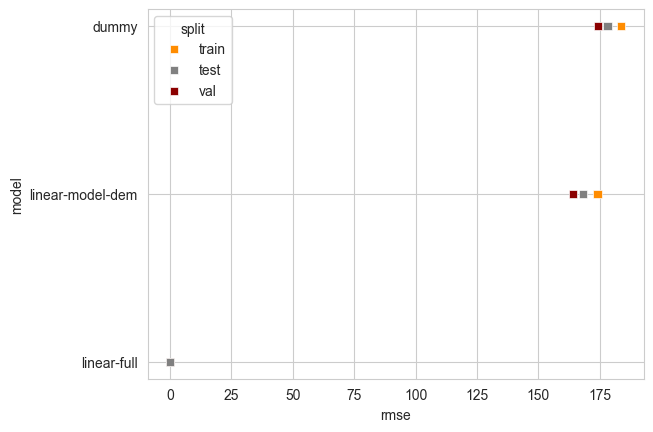

In [250]:
sns.set_style('whitegrid')
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])
plt.show()

# Regularisation


In [251]:
models = {} # storing fitted models in the next chunk
models['linear-0.0'] = reg

In [252]:
for alpha in [0.01, 0.1, 0.2, 0.5, 1.0, 20.0, 10.0, 100.0, 1000.0]:
    for est in [Lasso, Ridge]:
        if est == Lasso:
            id = 'lasso'
        else:
            id = 'ridge'
        reg = est(alpha=alpha).fit(X_train, y_train)
        models[f'{id}-{alpha}'] = reg
        for x,y,nsplit in zip([X_train, X_val, X_test],
                            [y_train, y_val, y_test],
                            ['train', 'val', 'test']):
            evaluate(performances,
                    model=reg, 
                    X=x, y=y, 
                    nsplit=nsplit, 
                    model_name=f'linear-{id}-alpha-{alpha}')

/Users/sylvainestebe/Code/DataSci-AU-24-1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.135e+04, tolerance: 4.100e+04
  model = cd_fast.enet_coordinate_descent(
/Users/sylvainestebe/Code/DataSci-AU-24-1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.014e+04, tolerance: 4.100e+04
  model = cd_fast.enet_coordinate_descent(
/Users/sylvainestebe/Code/DataSci-AU-24-1/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, c

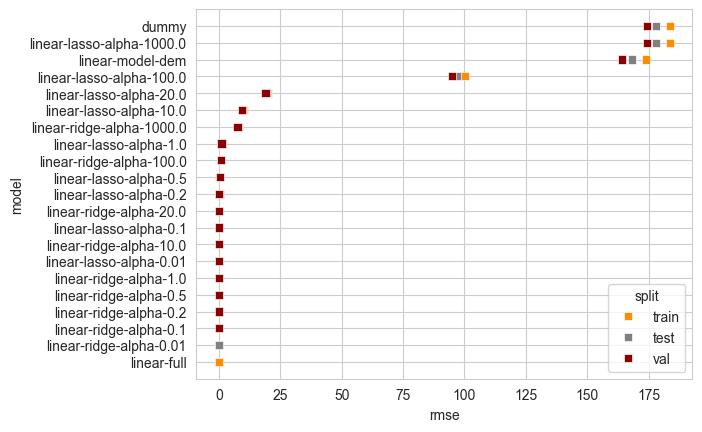

In [253]:
perf_df = pd.DataFrame(performances)
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])
plt.show()

In [254]:
coefs = pd.DataFrame(np.vstack([v.coef_.round(4) for v in models.values()]),
                     columns=data.iloc[:,:16].columns)
coefs['mtype'] = [k.split('-')[0] for k in models.keys()]
coefs['alpha'] = [float(k.split('-')[1]) for k in models.keys()]
coefs = pd.melt(coefs, id_vars=['mtype', 'alpha'])# turning data into long format 

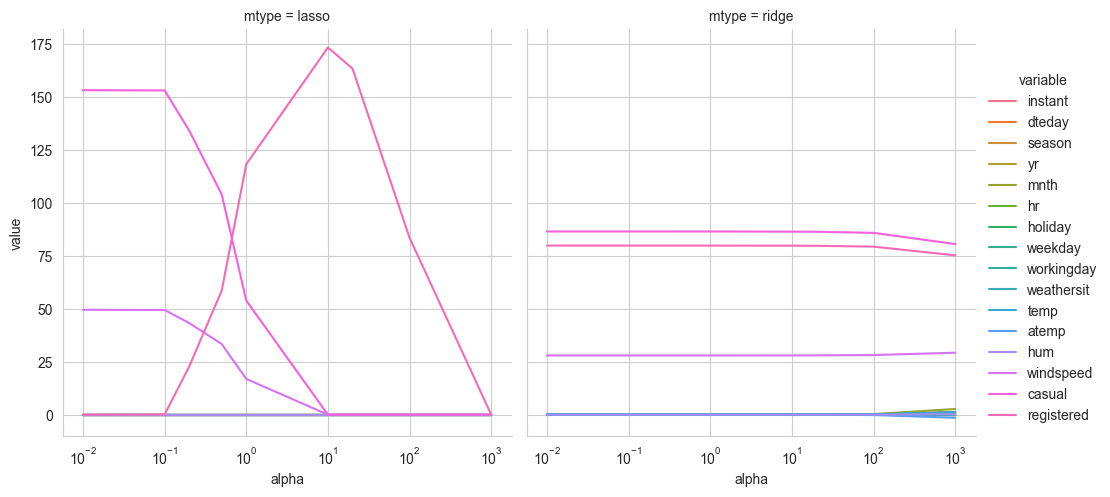

In [255]:
grid = sns.relplot(data=coefs[coefs['mtype']!='linear'], 
                   x='alpha', y='value', 
                   hue='variable', col='mtype', kind='line')
grid.set(xscale="log")

In [256]:
perf_df[perf_df['split']=='test'].sort_values(by='rmse', ascending=True)

,model,split,rmse,r2
8,linear-full,test,0.0000,1.0000
14,linear-ridge-alpha-0.01,test,0.0001,1.0000
20,linear-ridge-alpha-0.1,test,0.0009,1.0000
26,linear-ridge-alpha-0.2,test,0.0017,1.0000
32,linear-ridge-alpha-0.5,test,0.0043,1.0000
38,linear-ridge-alpha-1.0,test,0.0085,1.0000
11,linear-lasso-alpha-0.01,test,0.0136,1.0000
50,linear-ridge-alpha-10.0,test,0.0850,1.0000
17,linear-lasso-alpha-0.1,test,0.1051,1.0000
44,linear-ridge-alpha-20.0,test,0.1699,1.0000
